In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2 as cv
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import os

detector = tf.saved_model.load("/home/dawid/repos/OpenCV-Features/Pretrained")
label_path = "/home/dawid/repos/OpenCV-Features/Pretrained/labels.csv"

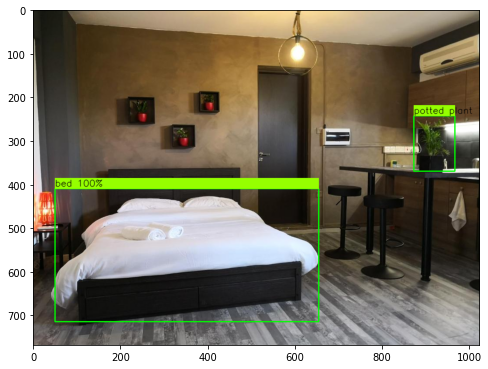

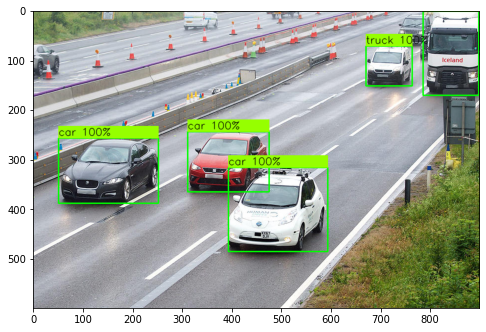

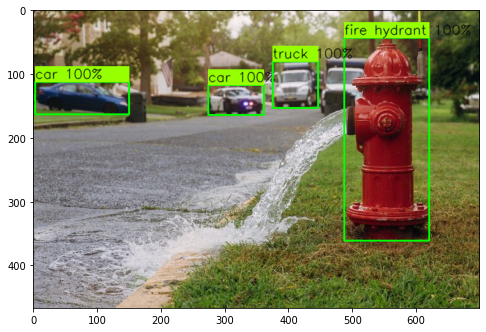

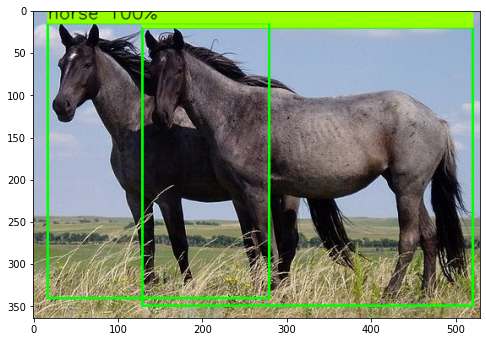

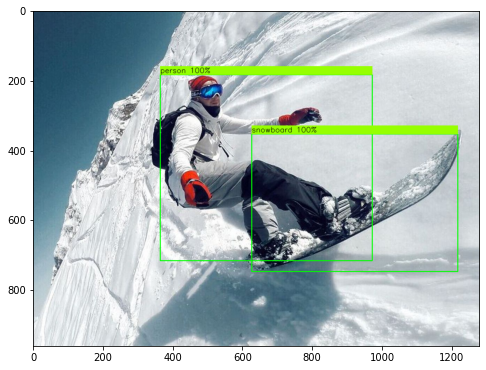

In [15]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

for i in load_images_from_folder("/home/dawid/repos/OpenCV-Features/images/tensorflow-test-images"):
    
    rgb = cv.cvtColor(i, cv.COLOR_BGR2RGB)

    rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)
    rgb_tensor = tf.expand_dims(rgb_tensor, 0)
    rgb_tensor


    label = pd.read_csv(label_path, sep=';', index_col='ID')
    labels = label['OBJECT (2017 REL.)']
    #print(labels)

    boxes, scores, classes, num_detection = detector(rgb_tensor)
    num_detection

    pred_labels = classes.numpy().astype('int')[0]
    pred_labels = [labels[i] for i in pred_labels]

    pred_boxes = boxes.numpy()[0].astype('int')
    pred_scores = scores.numpy()[0]

    for score, (ymin, xmin, ymax, xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue

        img_boxes = cv.rectangle(rgb, (xmin, ymin), (xmax,ymax), (0,255,0), 2)
        font = cv.FONT_HERSHEY_SIMPLEX

        score_txt = f"{100 * round(score)}%"
        cv.rectangle(img_boxes, (xmin, ymin), (xmax, ymin-24), (150, 255, 0), -1)
        cv.putText(img_boxes, "%s"%label+" %s"%score_txt, (xmin, ymin-5), font, 0.7, (0, 0, 0), 1, cv.LINE_AA)

    plt.rcParams["figure.figsize"]=8, 8
    plt.imshow(img_boxes), plt.show()